# Required assignment 21.1: Building an interpretable decision tree

 Decision trees are effective tools for automated decision-making, but their true business value lies in being transparent and understandable. In this assignment, you will see how to make a decision tree interpretable.

In [1]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import _tree


The dataset used in this assignment contains, loan-related information used for analysis and modeling. It includes various features such as applicant information, loan amount, income, credit score, and loan status.



In [2]:
# Load your dataset into df (replace with actual data loading)
df = pd.read_csv('data/loandata.csv')


### Question 1: Encode the Categorical Columns

Encode the categorical columns ['field', 'selectiveCollege', 'sex'] using LabelEncoder and update the DataFrame df.Save the output to `df[col]`.

In [3]:
###GRADED CELL
categorical_cols = ['field', 'selectiveCollege', 'sex']
# YOUR CODE HERE
#raise NotImplementedError()
categorical_cols = ['field', 'selectiveCollege', 'sex']

for col in categorical_cols:
    le = LabelEncoder()
    
    # Handle missing values safely (LabelEncoder can't fit on NaNs)
    df[col] = df[col].fillna("Missing").astype(str)
    
    # Fit + transform and store back into the dataframe
    df[col] = le.fit_transform(df[col])
    
    
# Show the encoding map (original category -> encoded integer)
print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Encoded sex: {'Female': 0, 'Male': 1}


### Question 2: Create Test and Training Datasets
Split the data into training and test sets using train_test_split with 20% `test_size` and `random_seed=42`, creating X_train, X_test, y_train, y_test.

In [5]:
### GRADED CELL
X_train = None
X_test = None
y_train = None
y_test = None
# YOUR CODE HERE
#raise NotImplementedError()

from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=['Default'])
y = df['Default']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1600, 5)
(400, 5)
(1600,)
(400,)


### Question 3: Train a Decision Tree Classifier
Create and train a DecisionTreeClassifier with `max_depth=3`, `min_samples_leaf=5` and `random_state=42` using the training data and assign to `clf`.

In [6]:
###GRADED CELL
clf = None
# YOUR CODE HERE
#raise NotImplementedError()

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    max_depth=3,
    min_samples_leaf=5,
    random_state=42
)

# Train the classifier
clf.fit(X_train, y_train)

print(clf)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)


### Question 4: Calculate the Model's Accuracy
Calculate and print the accuracy score of the trained decision tree on the test set and store it in the variable `accuracy`.

In [7]:
###GRADED CELL
accuracy = None
# YOUR CODE HERE
#raise NotImplementedError()

from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 0.88


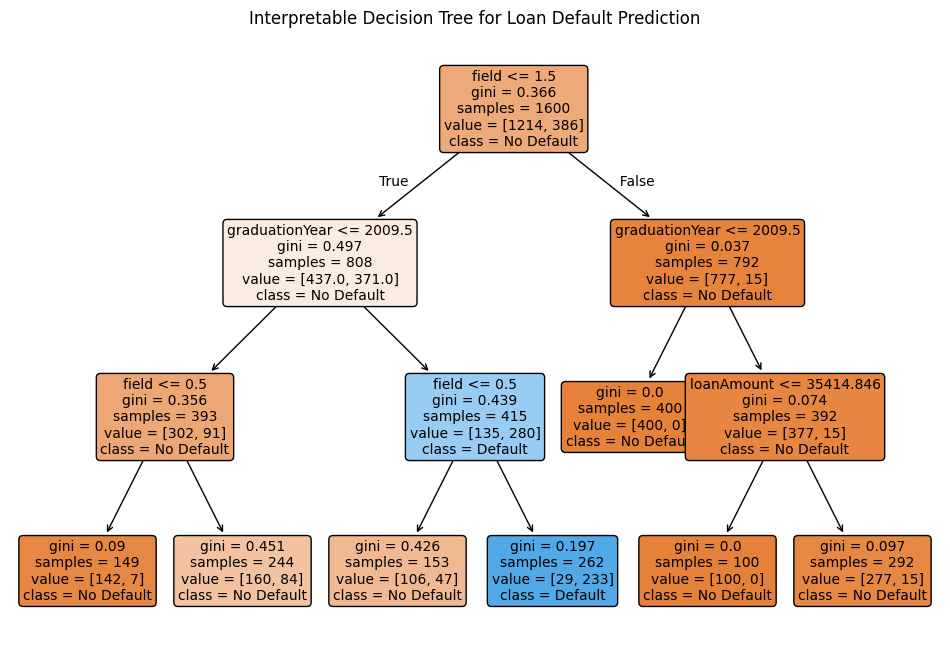

In [8]:
# Visualize the tree
plt.figure(figsize=(12,8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=['No Default', 'Default'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Interpretable Decision Tree for Loan Default Prediction")
plt.show()

### Question 5: Print the Tree's Rules
    
Complete the function recurse(node, depth) to print the decision tree rules. Your implementation should:

- Check whether the current node is a decision node or a leaf node.

- Print the feature and threshold used for splitting, if it is a decision node. 

- Recursively call the function on the left and right child nodes.

- If it is a leaf node, print the predicted class and its probability.

- Use the provided tree_, feature_names, and class_names to format your output.

In [9]:
### GRADED CELL

tree_ = clf.tree_
feature_names = list(X.columns)
class_names = ['No Default', 'Default']

def recurse(node, depth):
    indent = "  " * depth 
    # YOUR CODE HERE
    #raise NotImplementedError()

    # Check if this is a leaf node
    if tree_.feature[node] == -2:
        # Get class counts and probabilities
        values = tree_.value[node][0]
        total = values.sum()
        probs = values / total

        predicted_class = class_names[values.argmax()]
        prob = probs.max()

        print(f"{indent}Predict -> {predicted_class} (probability={prob:.2f})")

    else:
        # Decision node
        feature = feature_names[tree_.feature[node]]
        threshold = tree_.threshold[node]

        print(f"{indent}If {feature} <= {threshold:.2f}:")

        # Left child
        recurse(tree_.children_left[node], depth + 1)

        print(f"{indent}Else (if {feature} > {threshold:.2f}):")

        # Right child
        recurse(tree_.children_right[node], depth + 1)


print("Decision Tree Rules:")
recurse(0, 0)


Decision Tree Rules:
If field <= 1.50:
  If graduationYear <= 2009.50:
    If field <= 0.50:
      Predict -> No Default (probability=0.95)
    Else (if field > 0.50):
      Predict -> No Default (probability=0.66)
  Else (if graduationYear > 2009.50):
    If field <= 0.50:
      Predict -> No Default (probability=0.69)
    Else (if field > 0.50):
      Predict -> Default (probability=0.89)
Else (if field > 1.50):
  If graduationYear <= 2009.50:
    Predict -> No Default (probability=1.00)
  Else (if graduationYear > 2009.50):
    If loanAmount <= 35414.85:
      Predict -> No Default (probability=1.00)
    Else (if loanAmount > 35414.85):
      Predict -> No Default (probability=0.95)
